<a href="https://colab.research.google.com/github/Renator12/Restaurant-Datascience/blob/main/RESTAURANTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import requests
import json

In [27]:
def getapikey():
  key=input('Enter your api key')
  return f'{key}'

In [28]:
api_key=getapikey()
headers = {'Authorization': 'Bearer %s' % api_key}

Enter your api key9R3FRJDz3AkJyVwL5-oC6p6DwJXVhCaFbuj92Kci4XRTp0px5ukHi3AlsvuYvhuwMxKfyKM1C37S0y5uzDnDjvmuPHLh1Oq9SHWQ_BVM8sgWklQAUq3is9Ol688QY3Yx


**ENTER YOUR CRAVING TYPE TODAY(eg:chinese,indian,japanese,sandwich)**

In [29]:
key='Italian'

**PROVIDE YOUR LOCATION(Zip or exact address or approximate address**)

In [30]:
location='Downtown Toronto'

In [31]:
url='https://api.yelp.com/v3/businesses/search'
 
# In the dictionary, term can take values like food, cafes or businesses like McDonalds
params = {'term':key,'location':location,'limit':35}
req=requests.get(url, params=params, headers=headers)

In [32]:
import pandas as pd
import numpy as np


In [33]:
if req.status_code!=200:
  raise SystemExit("Incorrect call")


**PANDAS DATAFRAME THROUGH API**

In [34]:

# proceed only if the status code is 200
a=req.json()
for keys in a['businesses']:
    if 'price' in keys:
      df=pd.DataFrame(columns=['name','longtitude','latitude','rating','price','distance(meters)','title','imageurl'])
      print(keys['name'], keys['price'],keys['coordinates'])
      
      id=keys['id']
      coordinates=keys['coordinates']
    else:
      print(keys['id'])

Terroni $$ {'latitude': 43.65093142220604, 'longitude': -79.37569337725965}
Trattoria Mercatto $$ {'latitude': 43.65367, 'longitude': -79.38007}
Gusto 101 $$ {'latitude': 43.645002131066, 'longitude': -79.400309337027}
Donatello Restaurant $$$ {'latitude': 43.657425, 'longitude': -79.383474}
Cafe Oro Di Napoli $$ {'latitude': 43.6514257145518, 'longitude': -79.3721591972351}
Buca $$$ {'latitude': 43.64462, 'longitude': -79.40045}
Carisma $$$ {'latitude': 43.65032, 'longitude': -79.37596}
Mustachio Italian Eatery $ {'latitude': 43.65621, 'longitude': -79.38326}
La Bettola Di Terroni $$ {'latitude': 43.652094784779315, 'longitude': -79.37804176337187}
Fusaro's $$ {'latitude': 43.65341, 'longitude': -79.36956}
Fusaro's Kitchen $$ {'latitude': 43.64808, 'longitude': -79.39556}
Trattoria Nervosa $$ {'latitude': 43.67101, 'longitude': -79.39104}
Stelvio $$ {'latitude': 43.65168, 'longitude': -79.40769}
Trattoria Taverniti $$ {'latitude': 43.65511, 'longitude': -79.41348}
bvDj7-uBqVzzDpn2hC7V

**DATA ENGINEERING**

In [35]:
listkeys=list(a['businesses'][0].keys())#check columns
listkeys

['id',
 'alias',
 'name',
 'image_url',
 'is_closed',
 'url',
 'review_count',
 'categories',
 'rating',
 'coordinates',
 'transactions',
 'price',
 'location',
 'phone',
 'display_phone',
 'distance']

In [36]:
df=pd.DataFrame(columns=listkeys)
for x in a['businesses']:
  df=df.append(x,ignore_index=True)
df.head(3)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,nBl_4gw5ecGzNkHyzfii8g,terroni-toronto-8,Terroni,https://s3-media4.fl.yelpcdn.com/bphoto/iAJV0S...,False,https://www.yelp.com/biz/terroni-toronto-8?adj...,741,"[{'alias': 'italian', 'title': 'Italian'}]",3.5,"{'latitude': 43.65093142220604, 'longitude': -...",[],$$,"{'address1': '57A Adelaide Street E', 'address...",+14162033093,+1 416-203-3093,509.856681
1,lvv9Vv_5i4IwvDdofO_rKg,trattoria-mercatto-toronto,Trattoria Mercatto,https://s3-media2.fl.yelpcdn.com/bphoto/qD4u0G...,False,https://www.yelp.com/biz/trattoria-mercatto-to...,213,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",3.5,"{'latitude': 43.65367, 'longitude': -79.38007}",[],$$,"{'address1': '220 Yonge Street', 'address2': '...",+16473523390,+1 647-352-3390,104.039532
2,B70iTJjcPkuYn8ouUewWgw,gusto-101-toronto,Gusto 101,https://s3-media4.fl.yelpcdn.com/bphoto/nVqA7k...,False,https://www.yelp.com/biz/gusto-101-toronto?adj...,1049,"[{'alias': 'italian', 'title': 'Italian'}]",4.0,"{'latitude': 43.645002131066, 'longitude': -79...",[],$$,"{'address1': '101 Portland Street', 'address2'...",+14165049669,+1 416-504-9669,2004.094775


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             35 non-null     object 
 1   alias          35 non-null     object 
 2   name           35 non-null     object 
 3   image_url      35 non-null     object 
 4   is_closed      35 non-null     object 
 5   url            35 non-null     object 
 6   review_count   35 non-null     object 
 7   categories     35 non-null     object 
 8   rating         35 non-null     float64
 9   coordinates    35 non-null     object 
 10  transactions   35 non-null     object 
 11  price          31 non-null     object 
 12  location       35 non-null     object 
 13  phone          35 non-null     object 
 14  display_phone  35 non-null     object 
 15  distance       35 non-null     float64
dtypes: float64(2), object(14)
memory usage: 4.5+ KB


**CONVERTING CATEGORIES ARRAY DICTIONARY INTO USEFUL INFORMATION**

In [38]:
df=df[df['categories'].astype(bool)] 

df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,nBl_4gw5ecGzNkHyzfii8g,terroni-toronto-8,Terroni,https://s3-media4.fl.yelpcdn.com/bphoto/iAJV0S...,False,https://www.yelp.com/biz/terroni-toronto-8?adj...,741,"[{'alias': 'italian', 'title': 'Italian'}]",3.5,"{'latitude': 43.65093142220604, 'longitude': -...",[],$$,"{'address1': '57A Adelaide Street E', 'address...",+14162033093,+1 416-203-3093,509.856681
1,lvv9Vv_5i4IwvDdofO_rKg,trattoria-mercatto-toronto,Trattoria Mercatto,https://s3-media2.fl.yelpcdn.com/bphoto/qD4u0G...,False,https://www.yelp.com/biz/trattoria-mercatto-to...,213,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",3.5,"{'latitude': 43.65367, 'longitude': -79.38007}",[],$$,"{'address1': '220 Yonge Street', 'address2': '...",+16473523390,+1 647-352-3390,104.039532
2,B70iTJjcPkuYn8ouUewWgw,gusto-101-toronto,Gusto 101,https://s3-media4.fl.yelpcdn.com/bphoto/nVqA7k...,False,https://www.yelp.com/biz/gusto-101-toronto?adj...,1049,"[{'alias': 'italian', 'title': 'Italian'}]",4.0,"{'latitude': 43.645002131066, 'longitude': -79...",[],$$,"{'address1': '101 Portland Street', 'address2'...",+14165049669,+1 416-504-9669,2004.094775
3,Q4RSmF0s-AkaegrLFCLEbg,donatello-restaurant-toronto,Donatello Restaurant,https://s3-media2.fl.yelpcdn.com/bphoto/mgG7W3...,False,https://www.yelp.com/biz/donatello-restaurant-...,167,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.0,"{'latitude': 43.657425, 'longitude': -79.383474}",[],$$$,"{'address1': '37 Elm Street', 'address2': '', ...",+14165955001,+1 416-595-5001,451.932043
4,-smUKwiwkWmz1qWUcgqYsg,cafe-oro-di-napoli-toronto,Cafe Oro Di Napoli,https://s3-media4.fl.yelpcdn.com/bphoto/p0kt5H...,False,https://www.yelp.com/biz/cafe-oro-di-napoli-to...,74,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.5,"{'latitude': 43.6514257145518, 'longitude': -7...",[],$$,"{'address1': '75 Jarvis Street', 'address2': '...",+14163157979,+1 416-315-7979,680.657485
5,A7waf6G3cvnLfAqKeLL8DA,buca-toronto,Buca,https://s3-media1.fl.yelpcdn.com/bphoto/kqd7wf...,False,https://www.yelp.com/biz/buca-toronto?adjust_c...,440,"[{'alias': 'italian', 'title': 'Italian'}]",4.0,"{'latitude': 43.64462, 'longitude': -79.40045}",[],$$$,"{'address1': '604 King Street W', 'address2': ...",+14168651600,+1 416-865-1600,2039.879043
6,k3fn9JFiNLNy2q5p0cE1kg,carisma-toronto,Carisma,https://s3-media1.fl.yelpcdn.com/bphoto/c9ZEM4...,False,https://www.yelp.com/biz/carisma-toronto?adjus...,188,"[{'alias': 'italian', 'title': 'Italian'}]",4.0,"{'latitude': 43.65032, 'longitude': -79.37596}",[],$$$,"{'address1': '15 Toronto Street', 'address2': ...",+14168647373,+1 416-864-7373,558.996885
7,WzleXDgNBtwNo80gn7CgEg,mustachio-italian-eatery-toronto,Mustachio Italian Eatery,https://s3-media1.fl.yelpcdn.com/bphoto/iqiq4F...,False,https://www.yelp.com/biz/mustachio-italian-eat...,14,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.0,"{'latitude': 43.65621, 'longitude': -79.38326}",[],$,"{'address1': '595 Bay St.', 'address2': '', 'a...",+16473528325,+1 647-352-8325,362.251993
8,VBcmyBxAPcpzbbnPbFfttA,la-bettola-di-terroni-toronto,La Bettola Di Terroni,https://s3-media2.fl.yelpcdn.com/bphoto/QaxtER...,False,https://www.yelp.com/biz/la-bettola-di-terroni...,146,"[{'alias': 'italian', 'title': 'Italian'}]",3.0,"{'latitude': 43.652094784779315, 'longitude': ...",[],$$,"{'address1': '106 Victoria Street', 'address2'...",+14165049998,+1 416-504-9998,306.766152
9,C4sVRSWeWuXo0OtnXewsjQ,fusaros-toronto-2,Fusaro's,https://s3-media2.fl.yelpcdn.com/bphoto/LzkiKq...,False,https://www.yelp.com/biz/fusaros-toronto-2?adj...,90,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.0,"{'latitude': 43.65341, 'longitude': -79.36956}",[],$$,"{'address1': '294 Richmond Street E', 'address...",+16473473309,+1 647-347-3309,794.837836


In [39]:
df.drop(columns='transactions',inplace=True)#REMOVING USELESS EMPTY COLUMNS

In [40]:
df['title']=df['categories'].apply(lambda x:x[0]['title'])
df['title']


0     Italian
1     Italian
2     Italian
3     Italian
4       Pizza
5     Italian
6     Italian
7       Pizza
8     Italian
9     Italian
10    Italian
11    Italian
12    Italian
13    Italian
14    Italian
15    Italian
16    Italian
17    Italian
18       Bars
19    Italian
20    Italian
21    Italian
22    Italian
23    Italian
24    Italian
25    Italian
26    Italian
27    Italian
28    Italian
29    Italian
30    Italian
31    Italian
32    Italian
33    Italian
34    Italian
Name: title, dtype: object

In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             35 non-null     object 
 1   alias          35 non-null     object 
 2   name           35 non-null     object 
 3   image_url      35 non-null     object 
 4   is_closed      35 non-null     object 
 5   url            35 non-null     object 
 6   review_count   35 non-null     object 
 7   categories     35 non-null     object 
 8   rating         35 non-null     float64
 9   coordinates    35 non-null     object 
 10  price          31 non-null     object 
 11  location       35 non-null     object 
 12  phone          35 non-null     object 
 13  display_phone  35 non-null     object 
 14  distance       35 non-null     float64
 15  title          35 non-null     object 
dtypes: float64(2), object(14)
memory usage: 4.6+ KB


In [42]:
df.isna().sum()

id               0
alias            0
name             0
image_url        0
is_closed        0
url              0
review_count     0
categories       0
rating           0
coordinates      0
price            4
location         0
phone            0
display_phone    0
distance         0
title            0
dtype: int64

In [43]:
df=df.fillna(0)
df['price']


0       $$
1       $$
2       $$
3      $$$
4       $$
5      $$$
6      $$$
7        $
8       $$
9       $$
10      $$
11      $$
12      $$
13      $$
14       0
15     $$$
16      $$
17       0
18      $$
19      $$
20     $$$
21      $$
22     $$$
23     $$$
24      $$
25       0
26     $$$
27    $$$$
28      $$
29       0
30     $$$
31      $$
32     $$$
33     $$$
34     $$$
Name: price, dtype: object

In [44]:
df['coordinates']
df['longitude']=df['coordinates'].apply(lambda x:x['longitude'])
df['latitude']=df['coordinates'].apply(lambda x:x['latitude'])
df.drop(columns='coordinates',inplace=True)

In [45]:
df.isna().sum()

id               0
alias            0
name             0
image_url        0
is_closed        0
url              0
review_count     0
categories       0
rating           0
price            0
location         0
phone            0
display_phone    0
distance         0
title            0
longitude        0
latitude         0
dtype: int64

In [46]:
dfnew=df.drop(columns=['id','alias','name','image_url','review_count','categories','location','phone','display_phone','longitude','latitude','is_closed','url'])
dfnew

,rating,price,distance,title
0,3.5,$$,509.856681,Italian
1,3.5,$$,104.039532,Italian
2,4.0,$$,2004.094775,Italian
3,4.0,$$$,451.932043,Italian
4,4.5,$$,680.657485,Pizza
5,4.0,$$$,2039.879043,Italian
6,4.0,$$$,558.996885,Italian
7,4.0,$,362.251993,Pizza
8,3.0,$$,306.766152,Italian
9,4.0,$$,794.837836,Italian


In [47]:
dfnew['title'].value_counts()

Italian    32
Pizza       2
Bars        1
Name: title, dtype: int64

In [48]:
dfnew

,rating,price,distance,title
0,3.5,$$,509.856681,Italian
1,3.5,$$,104.039532,Italian
2,4.0,$$,2004.094775,Italian
3,4.0,$$$,451.932043,Italian
4,4.5,$$,680.657485,Pizza
5,4.0,$$$,2039.879043,Italian
6,4.0,$$$,558.996885,Italian
7,4.0,$,362.251993,Pizza
8,3.0,$$,306.766152,Italian
9,4.0,$$,794.837836,Italian


In [49]:
dfnew=pd.get_dummies(data=dfnew,columns=['title'])


In [50]:

dfnew['distance']=(dfnew['distance']-dfnew['distance'].mean())/dfnew['distance'].std()

dfnew

,rating,price,distance,title_Bars,title_Italian,title_Pizza
0,3.5,$$,-0.909989,0,1,0
1,3.5,$$,-1.243870,0,1,0
2,4.0,$$,0.319378,0,1,0
3,4.0,$$$,-0.957646,0,1,0
4,4.5,$$,-0.769465,0,0,1
5,4.0,$$$,0.348819,0,1,0
6,4.0,$$$,-0.869560,0,1,0
7,4.0,$,-1.031429,0,0,1
8,3.0,$$,-1.077079,0,1,0
9,4.0,$$,-0.675524,0,1,0


In [51]:
dfnew.values

array([[3.5, '$$', -0.9099890433724424, 0, 1, 0],
       [3.5, '$$', -1.2438703030474965, 0, 1, 0],
       [4.0, '$$', 0.31937767477426654, 0, 1, 0],
       [4.0, '$$$', -0.9576458546976143, 0, 1, 0],
       [4.5, '$$', -0.7694647019335641, 0, 0, 1],
       [4.0, '$$$', 0.34881875811341945, 0, 1, 0],
       [4.0, '$$$', -0.8695595220584874, 0, 1, 0],
       [4.0, '$', -1.0314290551258432, 0, 0, 1],
       [3.0, '$$', -1.0770793740441211, 0, 1, 0],
       [4.0, '$$', -0.6755241693238676, 0, 1, 0],
       [4.0, '$$', -0.0878800742739924, 0, 1, 0],
       [4.0, '$$', 0.3563517651054863, 0, 1, 0],
       [4.0, '$$', 0.568530891729881, 0, 1, 0],
       [4.0, '$$', 0.9347566777622562, 0, 1, 0],
       [5.0, 0, -0.050796853348293314, 0, 1, 0],
       [4.0, '$$$', -0.7056862080923336, 0, 1, 0],
       [3.5, '$$', -0.693248880169209, 0, 1, 0],
       [4.0, 0, -0.10647582642924791, 0, 1, 0],
       [3.5, '$$', -0.8140265046576444, 1, 0, 0],
       [4.0, '$$', -0.4395324754803282, 0, 1, 0],
     

In [52]:
pricedict={0:0,'$':1,'$$':2,'$$$':3,'$$$$':4,'$$$$$':5}
dfnew['price']=dfnew['price'].apply(lambda x:pricedict[x])



In [53]:
df['price']=df['price'].apply(lambda x:pricedict[x])

In [54]:
dfnew

,rating,price,distance,title_Bars,title_Italian,title_Pizza
0,3.5,2,-0.909989,0,1,0
1,3.5,2,-1.243870,0,1,0
2,4.0,2,0.319378,0,1,0
3,4.0,3,-0.957646,0,1,0
4,4.5,2,-0.769465,0,0,1
5,4.0,3,0.348819,0,1,0
6,4.0,3,-0.869560,0,1,0
7,4.0,1,-1.031429,0,0,1
8,3.0,2,-1.077079,0,1,0
9,4.0,2,-0.675524,0,1,0


In [55]:

url=f'https://api.yelp.com/v3/businesses/{id}/reviews'
req=requests.get(url, headers=headers)
for vals in req.json()['reviews']:
  print(vals['text'])


Food is average for the price. Service was very good and so was the vibe of the restaurant.  Overall the place is somewhat overrated.
Last night, a group of 10 friends and I went to Oretta to celebrate a birthday and we loved every minute of it.

We arrived to the restaurant for our...
We were going to Oretta to check out their Summerlicious menu, but after we saw their regular menu, we just had to try that instead!

Carciofi Fritti -...


In [56]:
print(coordinates['latitude'])


43.64392


In [57]:
import plotly.express as px

marker = dict(size = 8,opacity = 0.8, reversescale = True,autocolorscale = False,symbol = 'square', line = dict(width=1,color='rgba(102, 102, 102)'  ))
fig = px.scatter_geo(df,lat='latitude',lon='longitude', hover_name="price",color='name',size='rating')
fig.update_layout(title = 'restaurants with price ratings(scale 1-5)', title_x=0.5)
fig.show()

Text(0, 0.5, 'silhouette')

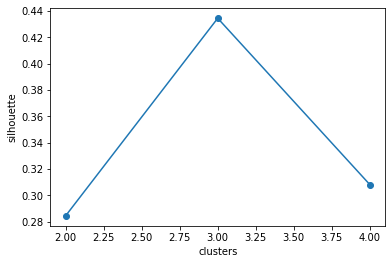

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
scores=[]
for n in range(2,min(5,dfnew.shape[0])):
  km=KMeans(n_clusters=n)
  km.fit_predict(dfnew.values)
  scores.append(silhouette_score(dfnew.values,km.labels_))
plt.plot([n for n in range(2,min(5,dfnew.shape[0]))],scores,marker='o')
plt.xlabel("clusters")
plt.ylabel("silhouette")

In [59]:
clusternum=np.argmax(scores)+2
km=KMeans(n_clusters=clusternum)
km.fit_predict(dfnew)
labels=km.labels_
df['labels']=labels
clusternum

3

In [60]:
show=df.sort_values(['distance'])
chosen=show.head(5)
chosen


,id,alias,name,image_url,is_closed,url,review_count,categories,rating,price,location,phone,display_phone,distance,title,longitude,latitude,labels
1,lvv9Vv_5i4IwvDdofO_rKg,trattoria-mercatto-toronto,Trattoria Mercatto,https://s3-media2.fl.yelpcdn.com/bphoto/qD4u0G...,False,https://www.yelp.com/biz/trattoria-mercatto-to...,213,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",3.5,2,"{'address1': '220 Yonge Street', 'address2': '...",+16473523390,+1 647-352-3390,104.039532,Italian,-79.380070,43.653670,0
8,VBcmyBxAPcpzbbnPbFfttA,la-bettola-di-terroni-toronto,La Bettola Di Terroni,https://s3-media2.fl.yelpcdn.com/bphoto/QaxtER...,False,https://www.yelp.com/biz/la-bettola-di-terroni...,146,"[{'alias': 'italian', 'title': 'Italian'}]",3.0,2,"{'address1': '106 Victoria Street', 'address2'...",+14165049998,+1 416-504-9998,306.766152,Italian,-79.378042,43.652095,0
7,WzleXDgNBtwNo80gn7CgEg,mustachio-italian-eatery-toronto,Mustachio Italian Eatery,https://s3-media1.fl.yelpcdn.com/bphoto/iqiq4F...,False,https://www.yelp.com/biz/mustachio-italian-eat...,14,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.0,1,"{'address1': '595 Bay St.', 'address2': '', 'a...",+16473528325,+1 647-352-8325,362.251993,Pizza,-79.383260,43.656210,1
3,Q4RSmF0s-AkaegrLFCLEbg,donatello-restaurant-toronto,Donatello Restaurant,https://s3-media2.fl.yelpcdn.com/bphoto/mgG7W3...,False,https://www.yelp.com/biz/donatello-restaurant-...,167,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.0,3,"{'address1': '37 Elm Street', 'address2': '', ...",+14165955001,+1 416-595-5001,451.932043,Italian,-79.383474,43.657425,0
0,nBl_4gw5ecGzNkHyzfii8g,terroni-toronto-8,Terroni,https://s3-media4.fl.yelpcdn.com/bphoto/iAJV0S...,False,https://www.yelp.com/biz/terroni-toronto-8?adj...,741,"[{'alias': 'italian', 'title': 'Italian'}]",3.5,2,"{'address1': '57A Adelaide Street E', 'address...",+14162033093,+1 416-203-3093,509.856681,Italian,-79.375693,43.650931,0


In [61]:
chosennames=list(chosen['name'])
chosennames

['Trattoria Mercatto',
 'La Bettola Di Terroni',
 'Mustachio Italian Eatery',
 'Donatello Restaurant',
 'Terroni']

In [62]:
vals=list(chosen['image_url']) 
vals

['https://s3-media2.fl.yelpcdn.com/bphoto/qD4u0GhMLL8xZseN-nKavg/o.jpg',
 'https://s3-media2.fl.yelpcdn.com/bphoto/QaxtERagdCpxTjsnNxrFew/o.jpg',
 'https://s3-media1.fl.yelpcdn.com/bphoto/iqiq4FxcoAQhNjB6u3K5nw/o.jpg',
 'https://s3-media2.fl.yelpcdn.com/bphoto/mgG7W3MH6l1OHE4z59aZwg/o.jpg',
 'https://s3-media4.fl.yelpcdn.com/bphoto/iAJV0SVAa6NtBM1ivPHpHw/o.jpg']

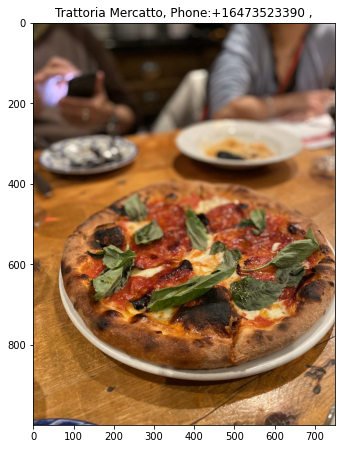

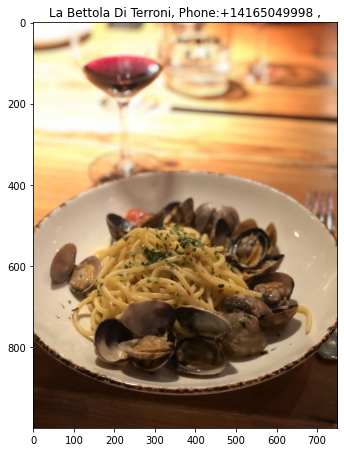

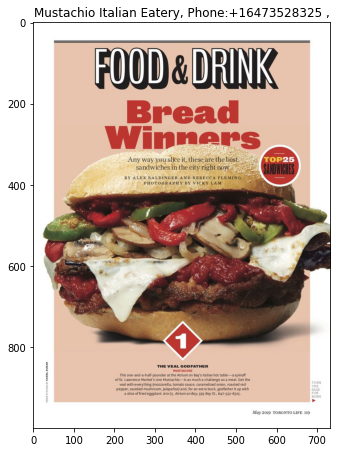

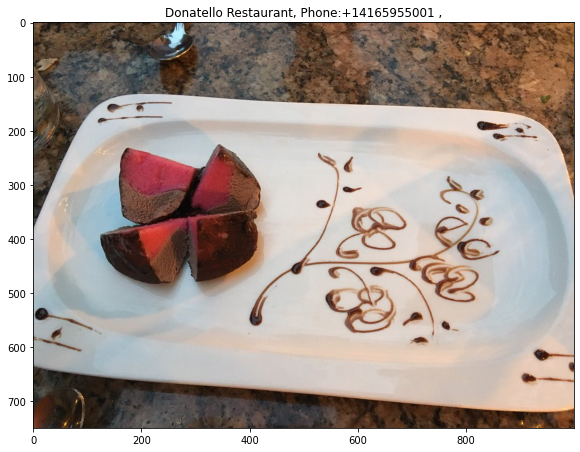

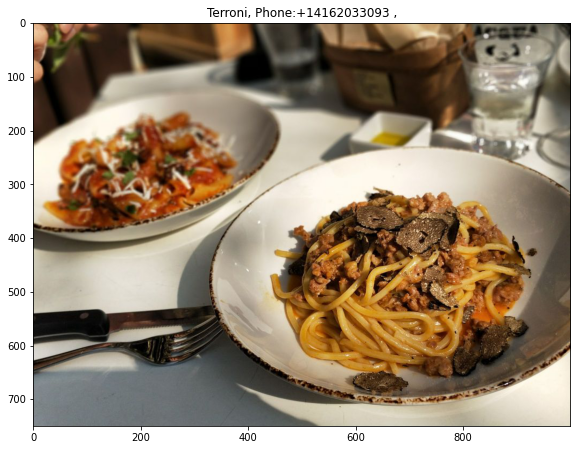

In [63]:
import PIL
import urllib.request
import io


def show(vals,details=False):

  for i,url1 in enumerate(vals):
    if url1 !='':
      plt.figure(figsize=(30,30))
      response = requests.get(url1)
      image_bytes = io.BytesIO(response.content)

      img = PIL.Image.open(image_bytes)
      plt.subplot(5,1,i+1)    # the number of images in the grid is 5*5 (25)
      plt.imshow(img)
      
        
      plt.title(f'{chosennames[i]}, Phone:{df[df["name"]==chosennames[i]]["phone"].values[0]} ,')
      plt.tight_layout()

  plt.show()
show(vals)

In [ ]:
name=input("enter the restaurant you like")
g=df[df['name']==name]['labels']
labelthis=g.iloc[0]
new=df[df['labels']==labelthis].sort_values(by=['rating'],ascending=False)
top3=new.head(3)
vals2=list(top3['image_url'])
show(vals2,details=True)
